In [28]:
#IMPORT THE LIBRARIES

In [29]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import scipy.stats as scp;
from sklearn.feature_selection import RFE;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import OneHotEncoder;
from sklearn.compose import ColumnTransformer;
from sklearn.preprocessing import LabelEncoder;
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split;
from sklearn.ensemble import ExtraTreesRegressor;
from sklearn.metrics import r2_score,accuracy_score;
import statsmodels.api as apl;
from sklearn.preprocessing import StandardScaler;
from sklearn.linear_model import LogisticRegression;
from sklearn.model_selection import cross_val_score,KFold;
from sklearn.model_selection import StratifiedKFold;
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,classification_report;
from imblearn.over_sampling import SMOTE ;
from imblearn.under_sampling import NearMiss;
import collections;
from sklearn.linear_model import Ridge;
from numpy import absolute;
from sklearn.model_selection import GridSearchCV;
from numpy import arange;
from sklearn.preprocessing import PowerTransformer;
from sklearn.linear_model import Lasso;
from sklearn.linear_model import ElasticNet;
from sklearn.preprocessing import PowerTransformer;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.svm import SVC;
import warnings ;
warnings.filterwarnings('ignore')

IMPORTING THE DATSET


In [30]:
df = pd.read_csv("frauds.csv");
print(df.info())
print(df.shape)
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2942 entries, 0 to 2941
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            2942 non-null   int64  
 1   type            2942 non-null   object 
 2   amount          2942 non-null   float64
 3   nameOrig        2942 non-null   object 
 4   oldbalanceOrg   2942 non-null   float64
 5   newbalanceOrig  2942 non-null   float64
 6   nameDest        2942 non-null   object 
 7   oldbalanceDest  2942 non-null   float64
 8   newbalanceDest  2942 non-null   float64
 9   isFraud         2942 non-null   int64  
 10  isFlaggedFraud  2942 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 253.0+ KB
None
(2942, 11)
      step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0        1   PAYMENT    9839.64  C1231006815      170136.00       160296.36   
1        1   PAYMENT    1864.28  C1666544295       21249.00        193

GETTING THE NUMERICAL , CATEGORICAL AND DISCRETE FEATURES

In [31]:
feature_having_na = [feature for feature in df.columns if df[feature].isnull().sum()>1]
print('feature having na:- ', feature_having_na);
numerical_feature = [feature for feature in df.columns if df[feature].dtypes !='O' ]
print('numerical features are ', numerical_feature, 'count of numerical featuers are ', len(numerical_feature))
categorical_feature = list(set(df.columns)-set(numerical_feature))
print('categorical_feature are ', categorical_feature, 'count of categorical_feature are ', len(categorical_feature))

descrete_features = [feature for feature in numerical_feature if len(df[feature].unique())<25]
print('descrete features are ', descrete_features, 'count of descrete_features are ', len(descrete_features))


feature having na:-  []
numerical features are  ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'] count of numerical featuers are  8
categorical_feature are  ['type', 'nameDest', 'nameOrig'] count of categorical_feature are  3
descrete features are  ['step', 'isFraud', 'isFlaggedFraud'] count of descrete_features are  3


GETTING THE NULL AND DUPLICATE VALUES IN THE DATA

In [32]:
print(df.isnull().sum())
print(" Duplicates in the data ",df[df.duplicated()])
print("skewness in the data ", df.skew())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
 Duplicates in the data  Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []
skewness in the data  step               3.109488
amount             6.082081
oldbalanceOrg      2.273359
newbalanceOrig     2.244902
oldbalanceDest     4.840785
newbalanceDest     4.266904
isFraud           13.456043
isFlaggedFraud     0.000000
dtype: float64


GETTING THE NORMALITY OF THE FEATURES


skewness in the data  step               3.109488
amount             6.082081
oldbalanceOrg      2.273359
newbalanceOrig     2.244902
oldbalanceDest     4.840785
newbalanceDest     4.266904
isFraud           13.456043
isFlaggedFraud     0.000000
dtype: float64


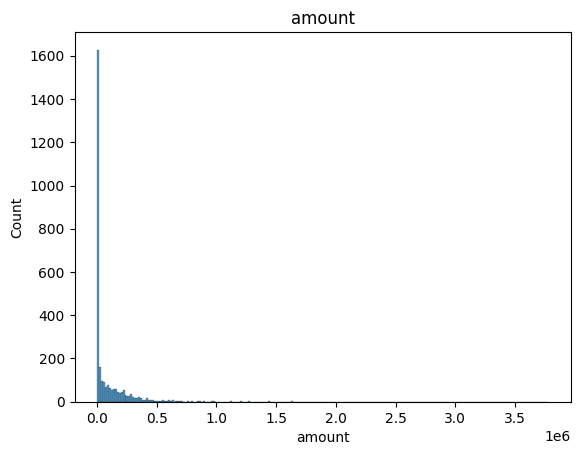

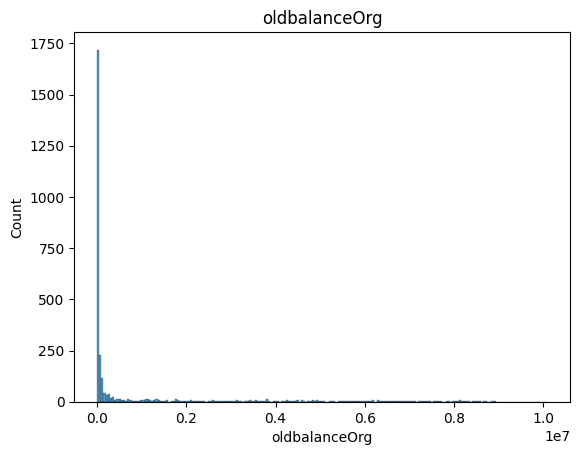

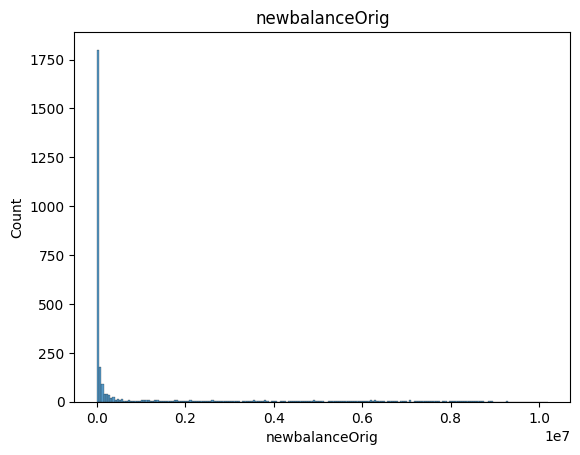

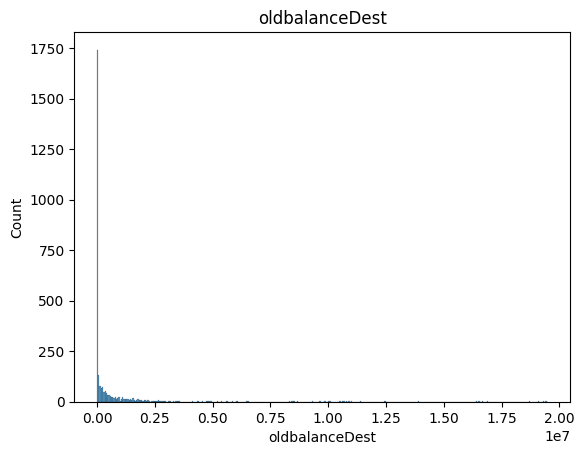

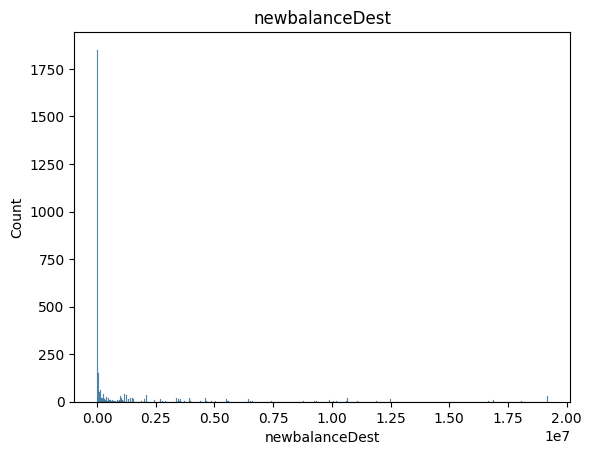

In [33]:
print("skewness in the data ", df.skew())



for i in numerical_feature:
    c=df.copy()
    if i not in descrete_features:
        sns.histplot(df[i])
        plt.title(i)
        plt.show()
    else:
        pass


TRANSFORMING THE FEATURES SKEWED TO A NORMAL DISTRIBUTED FEATURES

In [34]:
for j in numerical_feature:

    if df[j].nunique()>6:
        if df[j].skew()<=0 :
            df[j]=np.sqrt(df[j])
        else:
            df[j] = np.log1p(df[j])

print(df.skew())

step               3.109488
amount            -0.006959
oldbalanceOrg     -0.628578
newbalanceOrig    -0.228976
oldbalanceDest     0.173333
newbalanceDest     0.380161
isFraud           13.456043
isFlaggedFraud     0.000000
dtype: float64


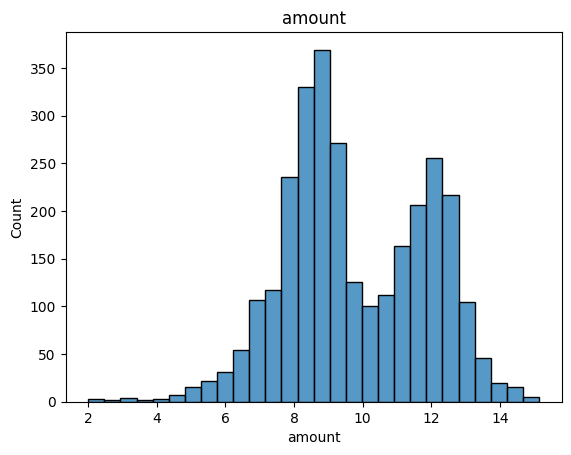

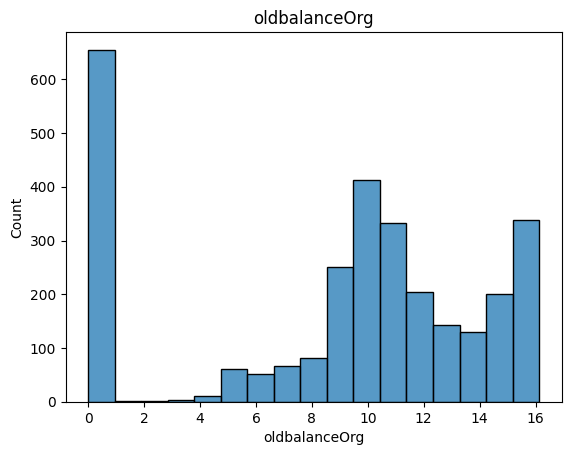

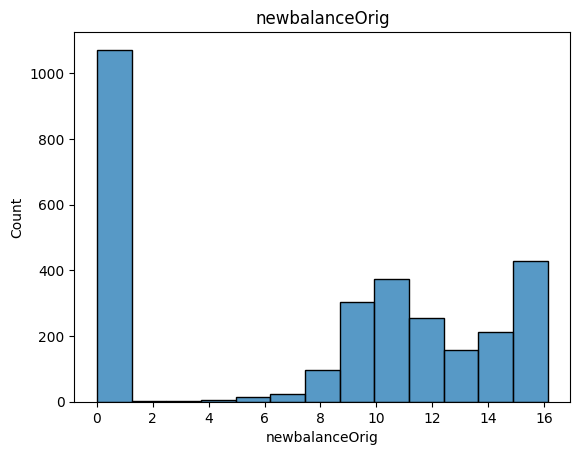

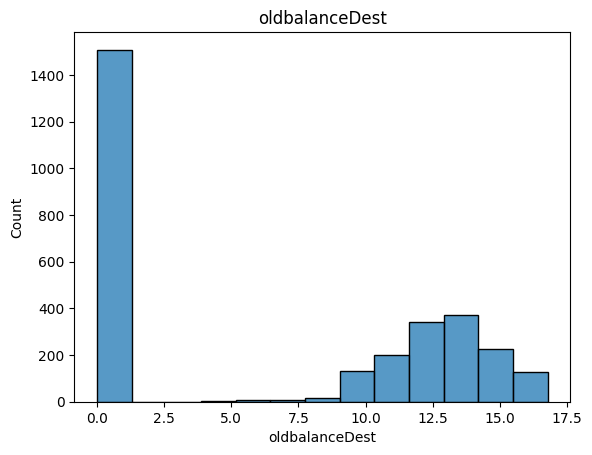

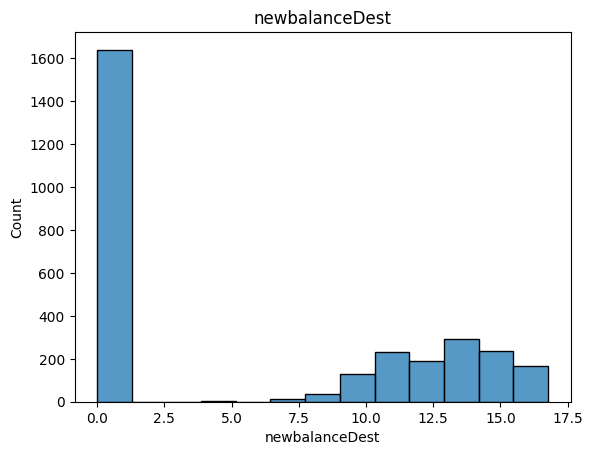

In [35]:
for l in numerical_feature:
    if l not in descrete_features:
        sns.histplot(df[l])
        plt.title(l)
        plt.show()

GETTING WHETHER THE DATA HAS OUTLIERS

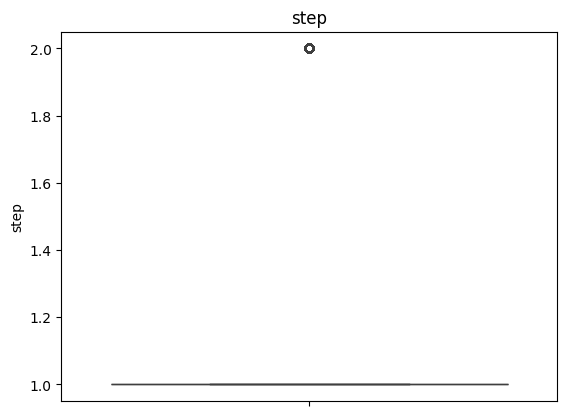

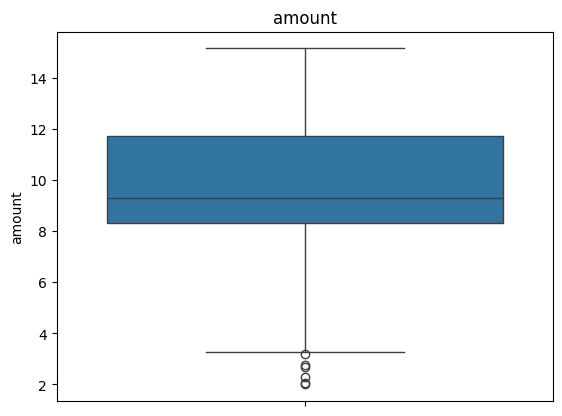

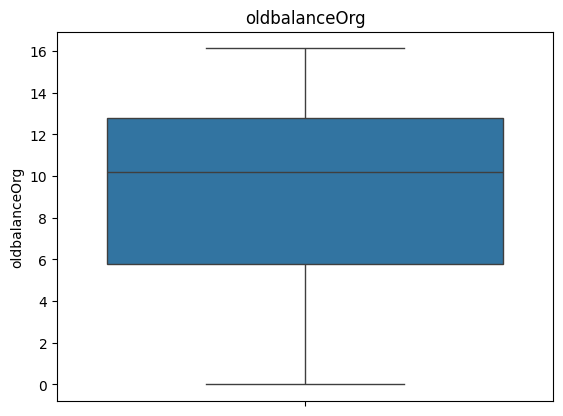

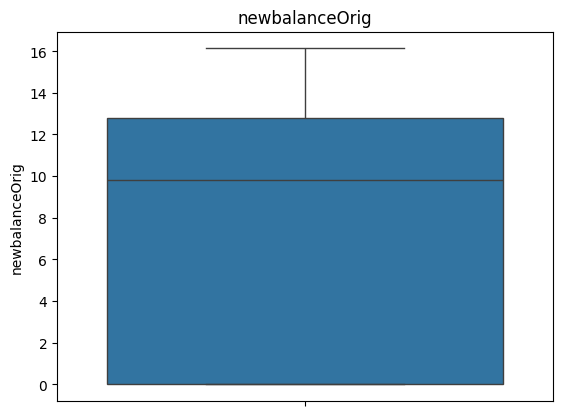

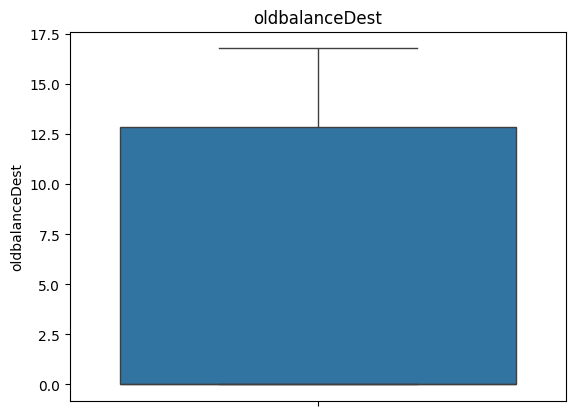

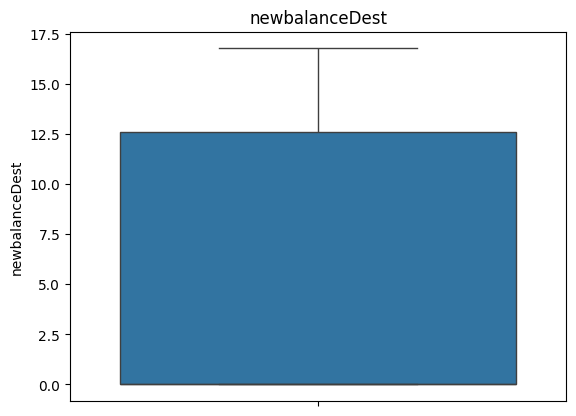

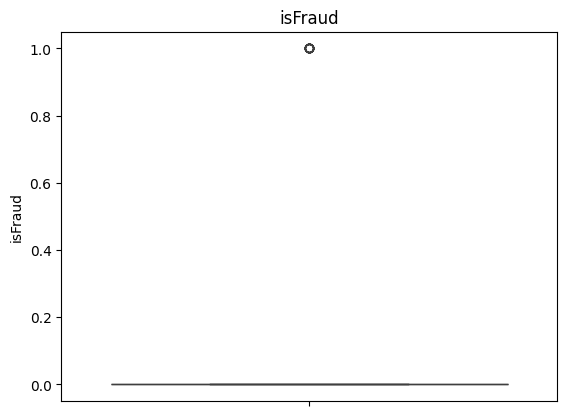

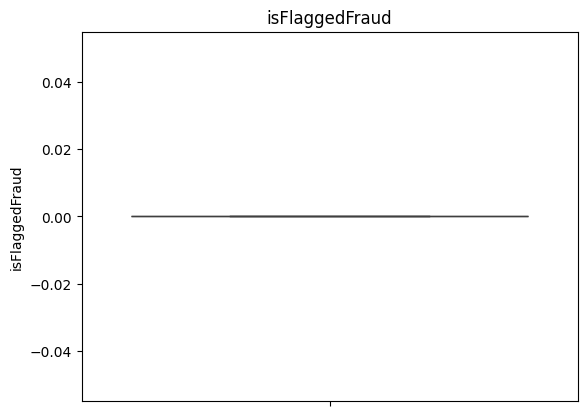

In [36]:
for i in numerical_feature:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

REMOVING THE OUTLIERS

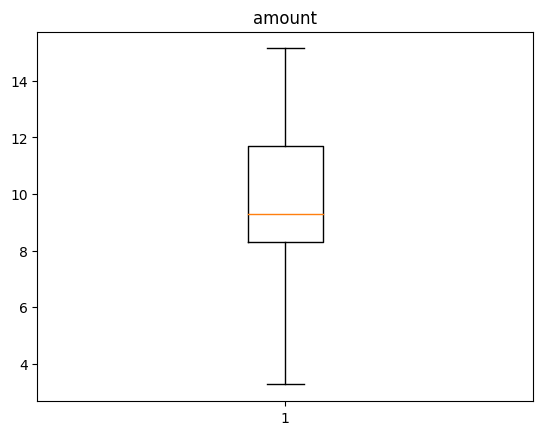

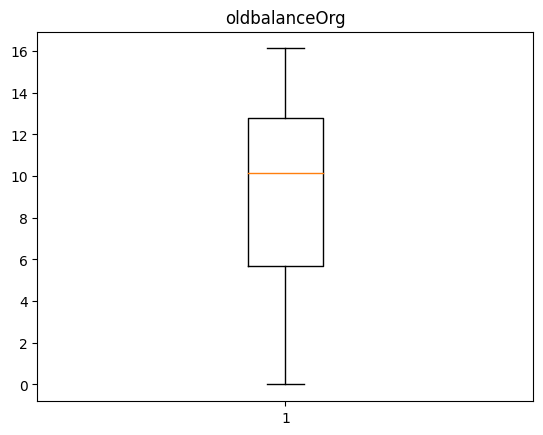

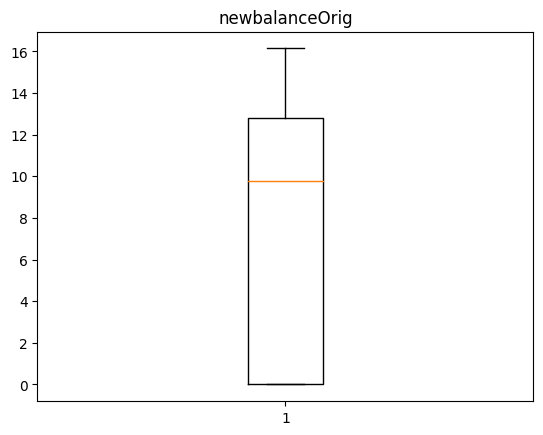

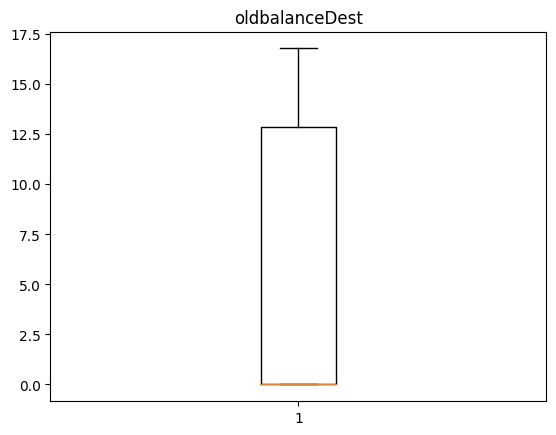

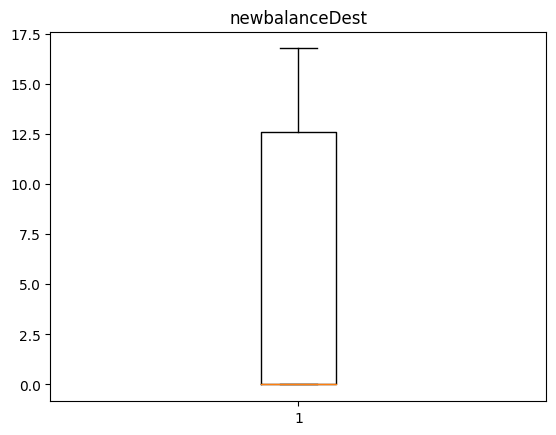

In [37]:
for j in numerical_feature:
    if j not in descrete_features:
        Q11= np.percentile(df[j],25)
        Q13= np.percentile(df[j],75)
        IQR3 = Q13-Q11
        lwr_bound3=Q11-(1.5*IQR3)
        upr_bound3=Q13+(1.5*IQR3)
        df.drop(df[df[j]>upr_bound3].index,inplace=True)
        df.drop(df[df[j]<lwr_bound3].index,inplace=True)
        plt.boxplot(df[j])
        plt.title(j)
        plt.show()

TRANSFORMING THE CATEGORICAL FEATURES INTO NUMERICAL FEATURES

In [38]:
for l in categorical_feature:
    unique_values_count = df[l].nunique()


    if df[l].nunique() > 6:
        label = LabelEncoder()
        df[l] = label.fit_transform(df[l])
    else:
        df=pd.get_dummies(df,columns=[l],drop_first=True);

print(df)

      step     amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0        1   9.194276       329      12.044359       11.984786      1028   
1        1   7.531166      1043       9.964112        9.872292      1078   
2        1   5.204007       453       5.204007        0.000000       205   
3        1   5.204007      2707       5.204007        0.000000       178   
4        1   9.364703      1656      10.634773       10.305174       449   
...    ...        ...       ...            ...             ...       ...   
2937     2  11.157130      1583      15.898367       15.907057       270   
2938     2  11.687595       669      15.907057       15.921656        35   
2939     2  11.060240      2808      15.921656       15.929366        68   
2940     2  11.735433       432      15.929366       15.944340       161   
2941     2  13.083847      1432      15.944340       16.000002       159   

      oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  \
0      

GETTING THE RELATIONSHIP BETWEEN THE VARIABLES

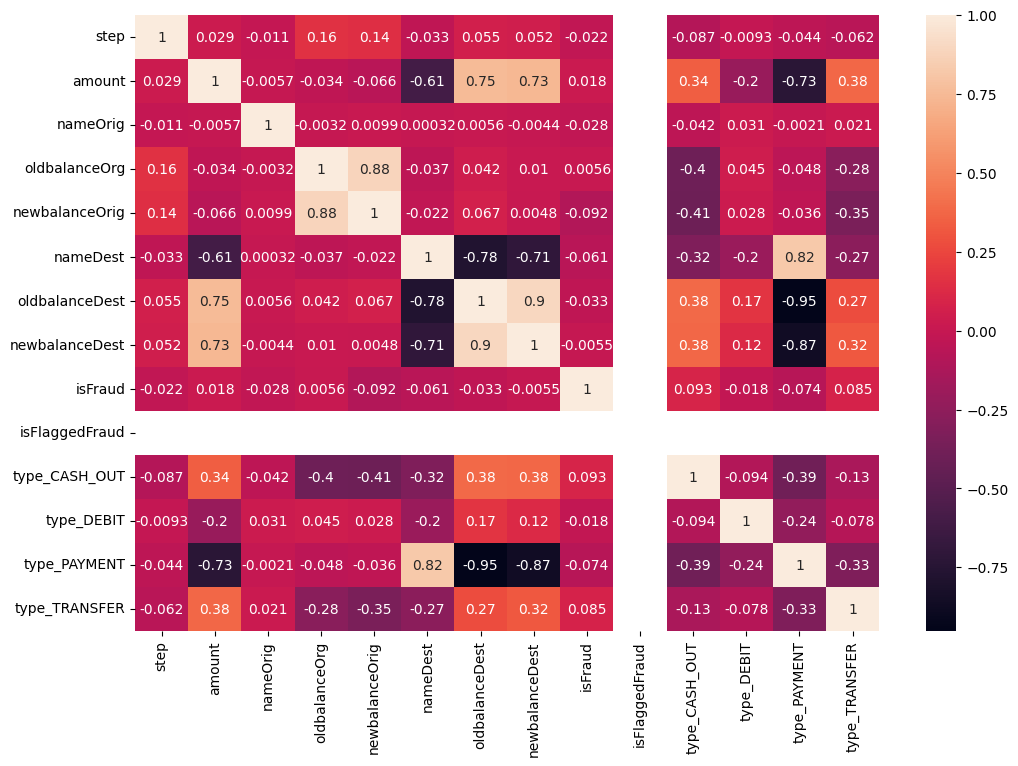

In [39]:
plt.figure(figsize=(12,8))
cor=df.corr();
sns.heatmap(cor,annot=True);
plt.show();

GETTING THE DEPENDENT AND INDEPENDENT VARIABLES

In [40]:
x=df.drop(["isFraud"],axis=1)
y=df["isFraud"]

print(x)
print(y)

      step     amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0        1   9.194276       329      12.044359       11.984786      1028   
1        1   7.531166      1043       9.964112        9.872292      1078   
2        1   5.204007       453       5.204007        0.000000       205   
3        1   5.204007      2707       5.204007        0.000000       178   
4        1   9.364703      1656      10.634773       10.305174       449   
...    ...        ...       ...            ...             ...       ...   
2937     2  11.157130      1583      15.898367       15.907057       270   
2938     2  11.687595       669      15.907057       15.921656        35   
2939     2  11.060240      2808      15.921656       15.929366        68   
2940     2  11.735433       432      15.929366       15.944340       161   
2941     2  13.083847      1432      15.944340       16.000002       159   

      oldbalanceDest  newbalanceDest  isFlaggedFraud  type_CASH_OUT  \
0           0.00

GETTING THE DEPENDENT VARIABLES IS THE DATA BALANCED

In [41]:
counter = collections.Counter(y)
print(" value counts",counter)

 value counts Counter({0: 2920, 1: 16})


BALANCING THE DATA IN THE DEPENDENT VARIABLE

In [42]:
under_sample = NearMiss(version=1,n_neighbors=3)
x_re , y_re = under_sample.fit_resample(x,y)
counter = collections.Counter(y_re)
print(counter)

sm = SMOTE(random_state = 2)
x_res, y_res = sm.fit_resample(x, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))
counter = collections.Counter(y_res)
print(" value counts",counter)

Counter({0: 16, 1: 16})
After OverSampling, the shape of train_X: (5840, 13)
After OverSampling, the shape of train_y: (5840,) 

 value counts Counter({0: 2920, 1: 2920})


SPLITTING THE DATA INTO TRAINING AND TEST DATA

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2)
print(x_train)

      step     amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
1643     1   7.361642      1919      10.850947       10.819970       775   
4417     1  10.208167       542       9.673141        0.000000       124   
3080     1  12.623308       506      12.623308        0.000000       161   
2785     2  10.498257      2581      15.953160       15.957426        71   
1026     1   7.363774      2672       9.821084        9.731585      1058   
...    ...        ...       ...            ...             ...       ...   
434      1  12.277707      1572      15.907113       15.933299       171   
1828     1   9.516135        59       0.000000        0.000000       249   
5434     1  12.125922      2517       2.930123        0.000000       177   
1932     1   6.973459      1672      10.095866       10.050859       314   
4585     1  10.416303       523      10.416303        0.000000        31   

      oldbalanceDest  newbalanceDest  isFlaggedFraud  type_CASH_OUT  \
1643        0.00

PERFORMING FEATURE SCALING

In [44]:
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test= sc.transform(x_test)
print(x_train)

[[-0.20133187 -1.31099573  0.74618566 ... -0.16716098  1.72909003
  -0.42578106]
 [-0.20133187  0.0656797  -0.88236667 ... -0.16716098 -0.57833888
  -0.42578106]
 [-0.20133187  1.2337235  -0.9249432  ... -0.16716098 -0.57833888
   2.34862493]
 ...
 [-0.20133187  0.99317088  1.45342915 ... -0.16716098 -0.57833888
  -0.42578106]
 [-0.20133187 -1.49873437  0.45406335 ... -0.16716098  1.72909003
  -0.42578106]
 [-0.20133187  0.16634156 -0.90483761 ... -0.16716098 -0.57833888
   2.34862493]]


GETTING THE FEATURE INPORTANCE

In [45]:
log = LogisticRegression()
rfe=RFE(log)
l=rfe.fit(x,y)

print("Num Features: %d" % l.n_features_)
print("Selected Features",x.columns[l.support_])
print("Feature Ranking: %s" % l.ranking_)

c= ExtraTreesRegressor()
lc=c.fit(x,y)
print(x.columns)
print(lc.feature_importances_)

Num Features: 6
Selected Features Index(['amount', 'newbalanceOrig', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')
Feature Ranking: [3 1 7 2 1 6 4 5 8 1 1 1 1]
Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')
[0.00216807 0.15310831 0.05406149 0.1289219  0.01697261 0.04523069
 0.29134786 0.2348653  0.         0.03214551 0.00586201 0.01635303
 0.01896323]


MODELING THE DATA USING CLASSIFICATION ALGORITHMS

In [46]:
log_reg = LogisticRegression(penalty='l2')
log_reg.fit(x_train,y_train)
log_res = LogisticRegression(penalty='l2')
log_res.fit(x_re,y_re)
log_pre= log_reg.predict(x_test)
log_l = log_res.predict(x_re)
print(" Test accuracy is ", accuracy_score(y_test,log_pre))
print(" Train accuracy is ", accuracy_score(y_train ,log_reg.predict(x_train)))
print(" Undersampling accuracy is ", accuracy_score(y_re,log_l))
print(confusion_matrix(y_test,log_pre))

 Test accuracy is  0.9897260273972602
 Train accuracy is  0.9944349315068494
 Undersampling accuracy is  0.96875
[[569  12]
 [  0 587]]


In [47]:
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(x_train,y_train)

# Make predictions on the testing set
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9965753424657534
Confusion Matrix:
[[577   4]
 [  0 587]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       581
           1       0.99      1.00      1.00       587

    accuracy                           1.00      1168
   macro avg       1.00      1.00      1.00      1168
weighted avg       1.00      1.00      1.00      1168



In [48]:
rfs = RandomForestClassifier()
rfs.fit(x_train,y_train)
rfs_pre = rfs.predict(x_test)
print("random forest classifier ")

accuracy_rfs = accuracy_score(y_test,rfs_pre)
conf_matrix_rfs = confusion_matrix(y_test,rfs_pre)
classification_rep_rfs = classification_report(y_test,rfs_pre)

# Print the results
print(f"Accuracy: {accuracy_rfs}")
print("Confusion Matrix:")
print(conf_matrix_rfs)
print("Classification Report:")
print(classification_rep_rfs)

random forest classifier 
Accuracy: 0.9991438356164384
Confusion Matrix:
[[580   1]
 [  0 587]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       581
           1       1.00      1.00      1.00       587

    accuracy                           1.00      1168
   macro avg       1.00      1.00      1.00      1168
weighted avg       1.00      1.00      1.00      1168



In [49]:
svc_reg = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the classifier
svc_reg.fit(x_train,y_train)

# Make predictions on the testing set
svc_pre = svc_reg.predict(x_test)

# Evaluate the model
accuracy_svc  = accuracy_score(y_test,svc_pre)
conf_matrix_svc = confusion_matrix(y_test,svc_pre)
classification_rep_svc = classification_report(y_test,svc_pre)

# Print the results
print(f"Accuracy: {accuracy_svc}")
print("Confusion Matrix:")
print(conf_matrix_svc)
print("Classification Report:")
print(classification_rep_svc)



Accuracy: 0.9991438356164384
Confusion Matrix:
[[580   1]
 [  0 587]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       581
           1       1.00      1.00      1.00       587

    accuracy                           1.00      1168
   macro avg       1.00      1.00      1.00      1168
weighted avg       1.00      1.00      1.00      1168



In [50]:
# we know that all the algorithms work better with these data